## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

In [2]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

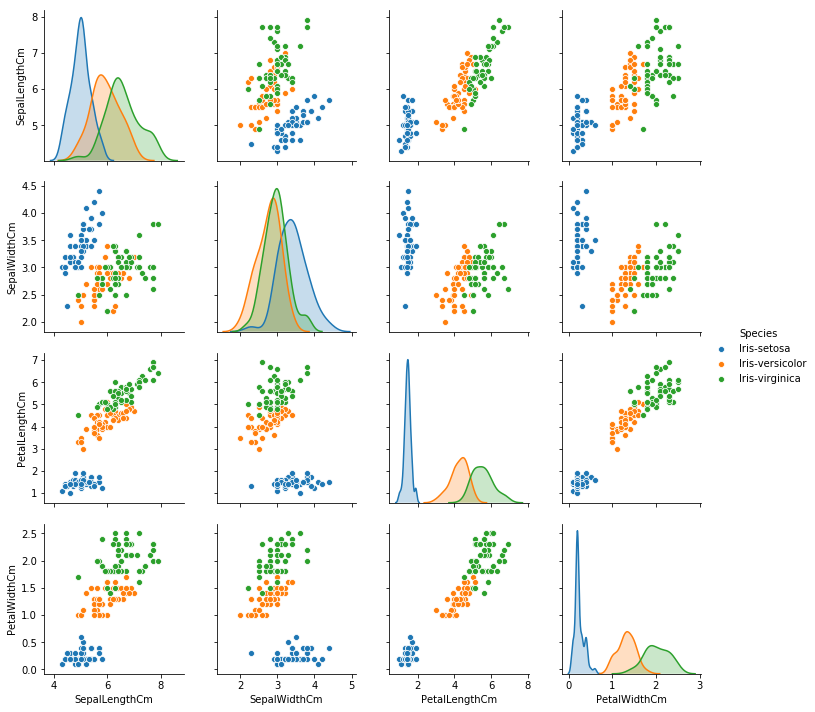

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("lesson_source/Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.as_matrix())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

In [4]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [11]:
def train(n_split=0.3, n_learning=0.1, n_iter=10000):
    # Разделение данных на тренировочные и тестовые
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=n_split)
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = n_learning

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(n_iter):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    layer0_test = X_test
    layer1_test = sigmoid(np.dot(layer0_test, w0))
    layer2_test = sigmoid(np.dot(layer1_test, w1))
    layer2_test_error = y_test - layer2_test
    error_test = np.mean(np.abs(layer2_test_error))
    accuracy_test = (1 - error_test) * 100


    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения

    print(f"Точность нейронной сети {str(round(accuracy,2))}%, параметры: {n_split}/{n_learning}/{n_iter}")
    print(f"Точность на тесте {str(round(accuracy_test,2))}%, параметры: {n_split}/{n_learning}/{n_iter}")

In [12]:
for i in range(10):
    for j in range(5):
        train(0.1 + 0.05*j, (i+1)*0.1, 10000)

Точность нейронной сети 97.17%, параметры: 0.1/0.1/10000
Точность на тесте 96.61%, параметры: 0.1/0.1/10000
Точность нейронной сети 96.81%, параметры: 0.15000000000000002/0.1/10000
Точность на тесте 95.44%, параметры: 0.15000000000000002/0.1/10000
Точность нейронной сети 96.66%, параметры: 0.2/0.1/10000
Точность на тесте 98.77%, параметры: 0.2/0.1/10000
Точность нейронной сети 94.88%, параметры: 0.25/0.1/10000
Точность на тесте 92.2%, параметры: 0.25/0.1/10000
Точность нейронной сети 96.2%, параметры: 0.30000000000000004/0.1/10000
Точность на тесте 98.22%, параметры: 0.30000000000000004/0.1/10000
Точность нейронной сети 97.51%, параметры: 0.1/0.2/10000
Точность на тесте 90.85%, параметры: 0.1/0.2/10000
Точность нейронной сети 98.66%, параметры: 0.15000000000000002/0.2/10000
Точность на тесте 93.8%, параметры: 0.15000000000000002/0.2/10000
Точность нейронной сети 97.34%, параметры: 0.2/0.2/10000
Точность на тесте 92.54%, параметры: 0.2/0.2/10000
Точность нейронной сети 99.73%, параметры

C:\Users\Viktor\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


Точность нейронной сети 94.6%, параметры: 0.30000000000000004/0.4/10000
Точность на тесте 94.86%, параметры: 0.30000000000000004/0.4/10000
Точность нейронной сети 97.36%, параметры: 0.1/0.5/10000
Точность на тесте 94.47%, параметры: 0.1/0.5/10000
Точность нейронной сети 97.82%, параметры: 0.15000000000000002/0.5/10000
Точность на тесте 91.63%, параметры: 0.15000000000000002/0.5/10000
Точность нейронной сети 96.57%, параметры: 0.2/0.5/10000
Точность на тесте 97.29%, параметры: 0.2/0.5/10000
Точность нейронной сети 78.09%, параметры: 0.25/0.5/10000
Точность на тесте 76.51%, параметры: 0.25/0.5/10000
Точность нейронной сети 98.64%, параметры: 0.30000000000000004/0.5/10000
Точность на тесте 95.58%, параметры: 0.30000000000000004/0.5/10000
Точность нейронной сети 75.63%, параметры: 0.1/0.6000000000000001/10000
Точность на тесте 82.34%, параметры: 0.1/0.6000000000000001/10000
Точность нейронной сети 62.58%, параметры: 0.15000000000000002/0.6000000000000001/10000
Точность на тесте 64.12%, пар

Не так много параметров можно менять, но я сделал подбор с низким количеством итераций, и мой лучший результат на тесте с минимальной скоростью обучения 0.1. Чем больше итераций, тем выше точность, при этом чем меньше скорость обучения, тем ближе мы окажемся к минимуму ошибки, но может не хватить числа итераций. Таким образом надо искать баланс низкой скорости обучения, достаточного числа итераций, чтобы с выбранной скоростью мы успели спуститься к минимума, и времени, сколько мы готовы потратить на обучение.